In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Dataset.csv')

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df = df.dropna(subset=['Cuisines'])

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df['Cuisines'].nunique()

1825

In [11]:
df['Cuisines_cleaned'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

In [12]:
df['Cuisines_cleaned'].nunique()

119

In [13]:
count=df['Cuisines_cleaned'].value_counts()
for i in count:
    print(i,end='\t')

2992	855	672	621	617	278	262	246	236	235	234	232	215	178	150	116	112	110	79	78	77	72	62	62	56	51	49	29	28	25	24	22	22	18	18	17	14	14	14	13	13	13	13	12	12	10	10	10	9	9	9	8	7	7	7	7	6	6	6	6	6	6	6	6	5	5	5	5	5	5	5	4	4	4	4	4	4	4	4	3	3	3	3	3	3	3	2	2	2	2	2	2	2	2	2	2	2	2	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	

In [14]:
top_n = df['Cuisines'].value_counts().nlargest(20).index
df = df[df['Cuisines'].isin(top_n)]
df['Cuisines'].unique()

array(['Chinese', 'Cafe', 'Bakery', 'Fast Food', 'South Indian',
       'North Indian, Mughlai', 'North Indian', 'Mughlai',
       'North Indian, Fast Food', 'North Indian, Chinese', 'Street Food',
       'North Indian, Mughlai, Chinese', 'Chinese, North Indian',
       'Bakery, Desserts', 'Ice Cream, Desserts', 'Chinese, Fast Food',
       'Bakery, Fast Food', 'Ice Cream', 'Mithai, Street Food',
       'Pizza, Fast Food'], dtype=object)

In [15]:
df['Cuisines'].value_counts()

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
North Indian, Fast Food            74
Ice Cream                          74
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cuisine_label'] = le.fit_transform(df['Cuisines'])

In [17]:
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(label_mapping)

{0: 'Bakery', 1: 'Bakery, Desserts', 2: 'Bakery, Fast Food', 3: 'Cafe', 4: 'Chinese', 5: 'Chinese, Fast Food', 6: 'Chinese, North Indian', 7: 'Fast Food', 8: 'Ice Cream', 9: 'Ice Cream, Desserts', 10: 'Mithai, Street Food', 11: 'Mughlai', 12: 'North Indian', 13: 'North Indian, Chinese', 14: 'North Indian, Fast Food', 15: 'North Indian, Mughlai', 16: 'North Indian, Mughlai, Chinese', 17: 'Pizza, Fast Food', 18: 'South Indian', 19: 'Street Food'}


In [18]:
df['Cuisine_label'].unique()

array([ 4,  3,  0,  7, 18, 15, 12, 11, 14, 13, 19, 16,  6,  1,  9,  5,  2,
        8, 10, 17])

In [19]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_cleaned', 'Cuisine_label'],
      dtype='object')

In [20]:
df=df.drop(['Cuisines','Cuisines_cleaned'], axis=1)

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_label'],
      dtype='object')

In [22]:
df=df.drop(['Restaurant ID','Restaurant Name','Address'],axis=1)

In [23]:
df['Country Code'].nunique()

13

<Axes: xlabel='Country Code', ylabel='Cuisine_label'>

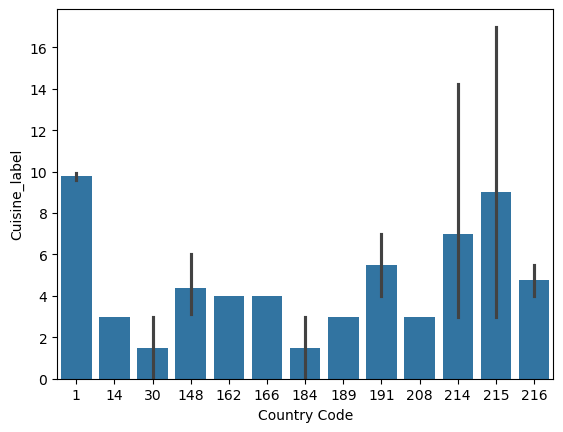

In [23]:
sns.barplot(x='Country Code',y='Cuisine_label',data=df)

In [24]:
df['City'].nunique()

67

In [25]:
df=df.drop('City',axis=1)

In [26]:
df['Locality'].nunique()

532

In [27]:
df=df.drop('Locality',axis=1)

In [28]:
df['Locality Verbose'].nunique()

568

In [29]:
df=df.drop('Locality Verbose',axis=1)

In [30]:
df['Longitude'].nunique()

3997

In [31]:
df['Latitude'].nunique()

4181

In [32]:
df=df.drop(['Longitude','Latitude'],axis=1)

In [33]:
df.columns

Index(['Country Code', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_label'],
      dtype='object')

<Axes: xlabel='Cuisine_label', ylabel='Average Cost for two'>

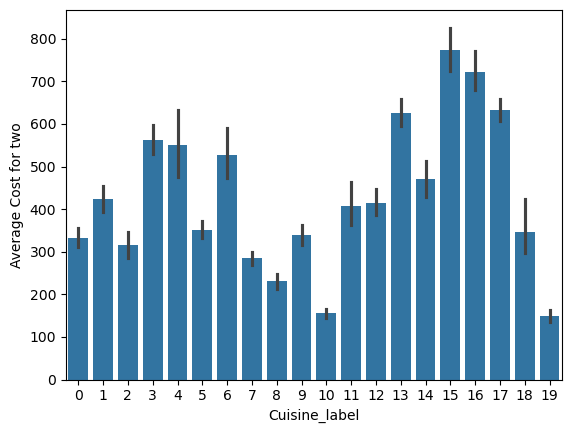

In [34]:
sns.barplot(x='Cuisine_label',y='Average Cost for two',data=df)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Average Cost for two_scaled']=scaler.fit_transform(df[['Average Cost for two']])
df.drop('Average Cost for two', axis=1, inplace=True)

<Axes: xlabel='Cuisine_label', ylabel='count'>

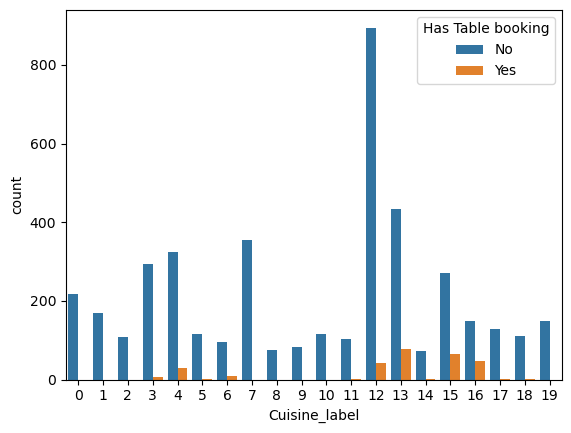

In [36]:
sns.countplot(x='Cuisine_label',data=df,hue='Has Table booking')

<Axes: xlabel='Cuisine_label', ylabel='count'>

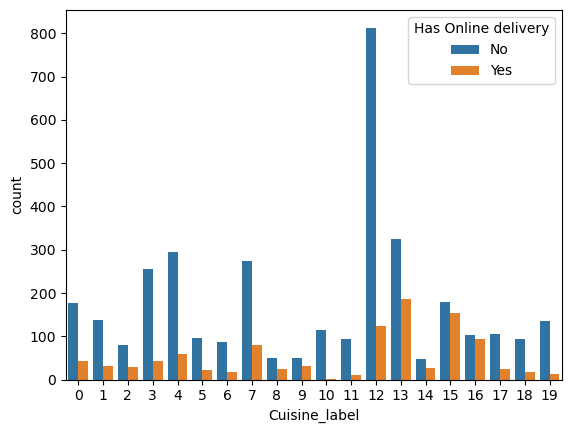

In [37]:
sns.countplot(x='Cuisine_label',data=df,hue='Has Online delivery')

<Axes: xlabel='Cuisine_label', ylabel='count'>

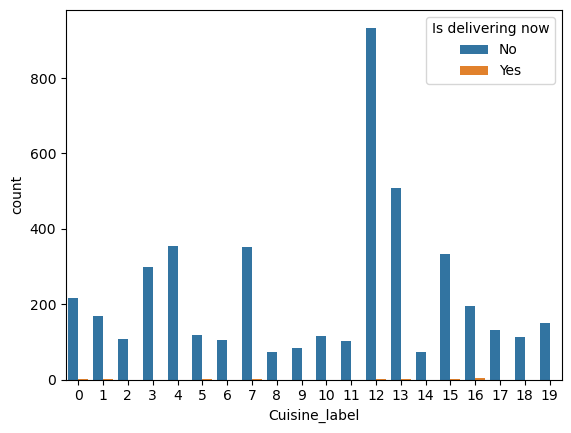

In [38]:
sns.countplot(x='Cuisine_label',data=df,hue='Is delivering now')

In [39]:
df=df.drop('Is delivering now',axis=1)

In [40]:
df['Switch to order menu'].nunique()

1

In [41]:
df=df.drop('Switch to order menu',axis=1)

In [42]:
df.columns

Index(['Country Code', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_label', 'Average Cost for two_scaled'],
      dtype='object')

In [43]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [44]:
df['Country Code'].unique()

array([162,  30, 216,  14, 184, 214,   1, 148, 215, 166, 189, 191, 208],
      dtype=int64)

In [45]:
df['Country Code new'] = le.fit_transform(df['Country Code'])

In [46]:
df['Country Code new'].unique()

array([ 4,  2, 12,  1,  6, 10,  0,  3, 11,  5,  7,  8,  9], dtype=int64)

In [47]:
df=df.drop('Country Code',axis=1)

<Axes: xlabel='Currency', ylabel='Cuisine_label'>

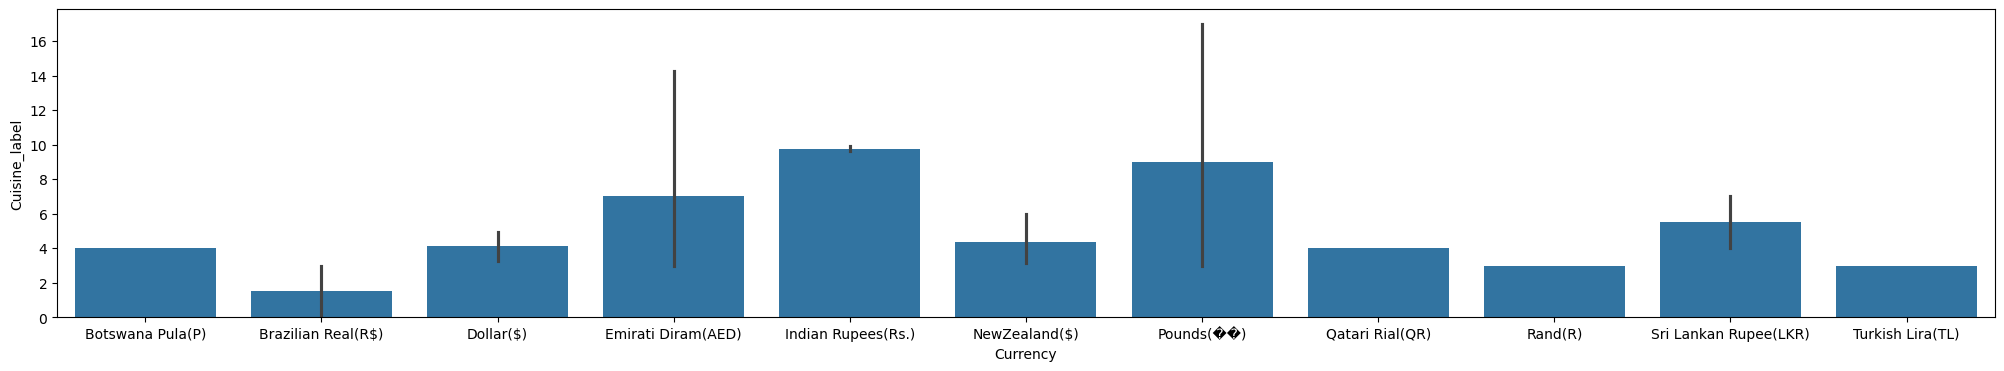

In [48]:
plt.figure(figsize=(25,4))
sns.barplot(x='Currency',y='Cuisine_label',data=df)

In [49]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)', 'NewZealand($)',
       'Pounds(��)', 'Qatari Rial(QR)', 'Rand(R)',
       'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)'], dtype=object)

In [50]:
df['Currency new'] = le.fit_transform(df['Currency'])

In [51]:
df['Currency new'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
df.columns

Index(['Currency', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Cuisine_label', 'Average Cost for two_scaled', 'Country Code new',
       'Currency new'],
      dtype='object')

In [53]:
df['Votes_scaled']=scaler.fit_transform(df[['Votes']])
df=df.drop('Votes', axis=1)

In [54]:
df['Price range'].unique()

array([3, 1, 2, 4], dtype=int64)

In [55]:
df['Price range'].value_counts()

Price range
1    2781
2    1421
3     276
4      68
Name: count, dtype: int64

In [57]:
df['Price_range_scaled'] = scaler.fit_transform(df[['Price range']])

In [58]:
df = df.drop('Price range',axis=1)

In [59]:
df['Price_range_scaled'].unique()

array([ 2.24099101, -0.70551517,  0.76773792,  3.7142441 ])

<Axes: xlabel='Price_range_scaled', ylabel='Cuisine_label'>

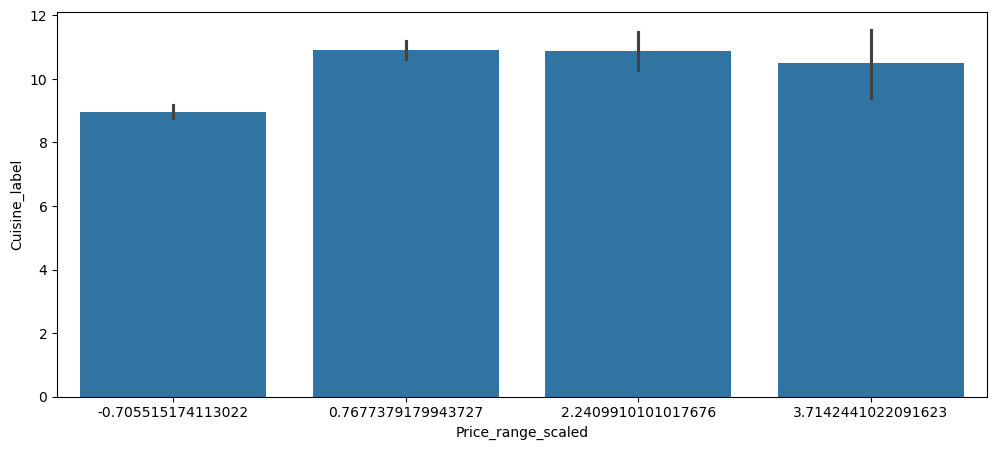

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(x='Price_range_scaled',y='Cuisine_label',data=df)

<Axes: xlabel='Cuisine_label', ylabel='Aggregate rating'>

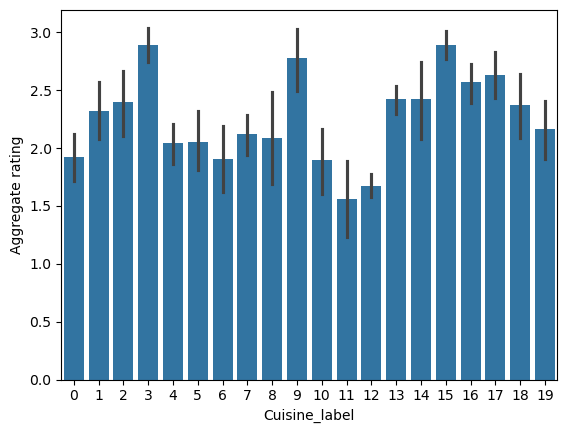

In [62]:
sns.barplot(x='Cuisine_label',y='Aggregate rating',data=df)

In [63]:
df=df.drop('Aggregate rating',axis=1)

<Axes: xlabel='Rating color', ylabel='Cuisine_label'>

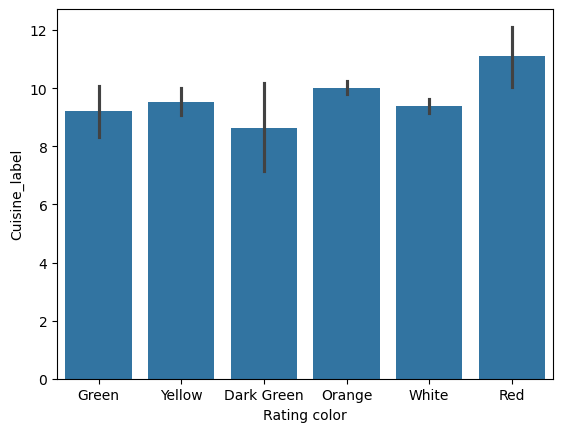

In [64]:
sns.barplot(y='Cuisine_label',x='Rating color',data=df)

In [65]:
df=df.drop('Rating color',axis=1)

<Axes: xlabel='Rating text', ylabel='Cuisine_label'>

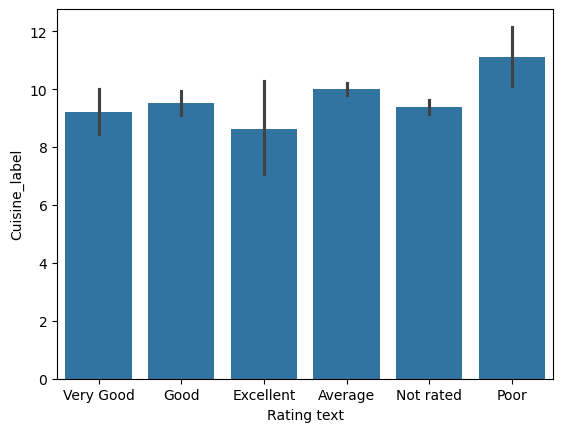

In [66]:
sns.barplot(y='Cuisine_label',x='Rating text',data=df)

In [67]:
df=df.drop('Rating text',axis=1)

In [68]:
df.columns

Index(['Currency', 'Has Table booking', 'Has Online delivery', 'Cuisine_label',
       'Average Cost for two_scaled', 'Country Code new', 'Currency new',
       'Votes_scaled', 'Price_range_scaled'],
      dtype='object')

In [74]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)', 'NewZealand($)',
       'Pounds(��)', 'Qatari Rial(QR)', 'Rand(R)',
       'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)'], dtype=object)

In [75]:
df['Currency'] = df['Currency'].map({'Botswana Pula(P)':0,'Brazilian Real(R$)':1,'Dollar($)':2,'Emirati Diram(AED)':3,'Indian Rupees(Rs.)':4,'NewZealand($)':5,'Pounds(��)':6,'Qatari Rial(QR)':7,'Rand(R)':8,'Sri Lankan Rupee(LKR)':9, 'Turkish Lira(TL)':10})

In [81]:
from sklearn.model_selection import train_test_split
X=df.drop(['Cuisine_label','Currency','Currency new'], axis=1)
y=df['Cuisine_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)#stratify ensure balanced split

In [82]:
#since the dataset has so much of imbalance and many classes have few records while rest have many 
#I used SMOTE to ensure balanced training
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [83]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
log_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [84]:
pred_log = log_model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:",accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))

Accuracy: 0.11436950146627566
              precision    recall  f1-score   support

           0       0.07      0.06      0.06        66
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        32
           3       0.47      0.09      0.15        90
           4       0.14      0.08      0.10       106
           5       0.05      0.46      0.10        35
           6       0.25      0.06      0.10        32
           7       0.20      0.03      0.05       106
           8       0.13      0.23      0.16        22
           9       0.04      0.16      0.07        25
          10       0.11      0.74      0.20        35
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00       281
          13       0.00      0.00      0.00       153
          14       0.00      0.00      0.00        22
          15       0.22      0.24      0.23       100
          16       0.15      0.25      0.19        

C:\Users\Mythili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mythili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mythili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [87]:
y_pred = model.predict(X_test)

In [94]:
print("Random Forest Performance:")
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Performance:
Accuracy: 0.1590909090909091
              precision    recall  f1-score   support

           0       0.07      0.05      0.05        66
           1       0.05      0.06      0.05        51
           2       0.08      0.09      0.09        32
           3       0.36      0.39      0.38        90
           4       0.17      0.08      0.11       106
           5       0.03      0.09      0.05        35
           6       0.07      0.09      0.08        32
           7       0.15      0.08      0.10       106
           8       0.07      0.14      0.09        22
           9       0.09      0.20      0.12        25
          10       0.18      0.49      0.26        35
          11       0.01      0.03      0.02        31
          12       0.29      0.14      0.19       281
          13       0.23      0.15      0.18       153
          14       0.04      0.09      0.06        22
          15       0.24      0.22      0.23       100
          16       0.12  

In [98]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    n_estimators=200,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print("Accuracy:",accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
Accuracy: 0.23093841642228738
              precision    recall  f1-score   support

           0       0.09      0.05      0.06        66
           1       0.03      0.02      0.03        51
           2       0.09      0.03      0.05        32
           3       0.33      0.37      0.35        90
           4       0.19      0.14      0.16       106
           5       0.00      0.00      0.00        35
           6       0.14      0.03      0.05        32
           7       0.13      0.11      0.12       106
           8       0.10      0.05      0.06        22
           9       0.14      0.12      0.13        25
          10       0.12      0.09      0.10        35
          11       0.00      0.00      0.00        31
          12       0.29      0.50      0.36       281
          13       0.22      0.22      0.22       153
          14       0.08      0.05      0.06        22
          15       0.23      0.22      0.23       100
          16       0

1. Logistic Regression

Accuracy: ~11% → barely better than random guessing
Most classes have precision/recall near zero, except a few (like class 10, 15, 17, 19).
Strongly struggling ,likely due to non-linearity of data and class imbalance.

2. Random Forest

Accuracy: ~16% → better than Logistic Regression but still low.
A few classes (3, 10, 12, 13, 15, 17) are recognized somewhat, but many remain weak.
Handles non-linear data better, but seems to suffer from class overlap and imbalance.
Confusion matrix shows predictions scattered across many wrong classes.

3. XGBoost

Accuracy: ~23% → best among the three.
Captures some structure of the data (class 12, 13, 17, 19 are predicted relatively better).
Still far from good performance → overfitting/underfitting issue depending on hyperparameters.
Shows that boosting is learning patterns missed by RF.

The poor performance across most models, including logistic regression and random forest, highlights the challenge of classifying cuisines in a highly imbalanced, multi-class dataset. The models performed better only on frequently occurring classes, while failing on the underrepresented ones. This reveals the importance of class distribution, data sufficiency per class, and thoughtful preprocessing for real-world classification tasks.